In [1]:
from langchain.chat_models import init_chat_model

In [3]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b
    Args:
      a: first int
      b: Second int
    """
    return a * b

def add(a: int, b: int) -> int:
    """Adds a and b
    Args:
      a: first int
      b: Second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a by b
    Args:
      a: first int
      b: Second int
    """
    return a / b

In [4]:
tools = [add, multiply, divide]
llm =  init_chat_model("gemini-2.0-flash-001", model_provider="google_vertexai")
llm_with_tools = llm.bind_tools(tools)

In [7]:
from utils import draw_graph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt import tools_condition, ToolNode
from langchain_core.messages import AIMessage, SystemMessage, HumanMessage


In [ ]:
# System Message
system_message = SystemMessage(content="You are an helpful assistant who can perform arthimetic operations")

# Node
def assistant(state: MessagesState) -> MessagesState:
    return {"messages": [llm_with_tools.invoke([system_message] + state["messages"])]}

# Graph
builder = StateGraph(MessagesState)

# Define nodes
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition
)

builder.add_edge("tools", "assistant")


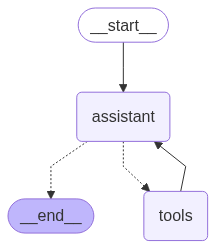

In [9]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
draw_graph(graph)

In [10]:
# input
initial_input = {"messages": HumanMessage(content="multiply 3 and 5")}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph
for event in graph.stream(
    input=initial_input,
    config=thread,
    stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

multiply 3 and 5
================================== Ai Message ==================================
Tool Calls:
  multiply (82e5bd6c-6688-4787-b84f-6fc747601f46)
 Call ID: 82e5bd6c-6688-4787-b84f-6fc747601f46
  Args:
    a: 3.0
    b: 5.0
================================= Tool Message =================================
Name: multiply

15
================================== Ai Message ==================================

The result of multiplying 3 and 5 is 15.


# Browsing History

In [11]:
graph.get_state(config=thread)

StateSnapshot(values={'messages': [HumanMessage(content='multiply 3 and 5', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 3.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 99, 'candidates_token_count': 5, 'total_token_count': 104, 'prompt_tokens_details': [{'modality': 1, 'token_count': 99}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-001'}, id='run--4adad785-b79e-4a9a-bbb4-46b32eff1a43-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3.0, 'b': 5.0}, 'id': '82e5bd6c-6688-4787-b84f-6fc747601f46', 'type': 'tool_call'}], usage_metadata={'input_tokens': 99, 'output_tokens': 5, 'total_tokens': 104}), ToolMessage(c

In [12]:
all_states = [ state for state in graph.get_state_history(thread)]

In [13]:
len(all_states)

5

In [14]:
all_states[-2]


StateSnapshot(values={'messages': [HumanMessage(content='multiply 3 and 5', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ab6-cd5b-6c2f-8000-71a90aae95eb'}}, metadata={'source': 'loop', 'writes': None, 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-06-15T05:41:46.266731+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ab6-cd51-6f56-bfff-9772197cd613'}}, tasks=(PregelTask(id='6fb3056b-08c0-4d4d-104b-7c900ed2ad57', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 3.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 99, 'candidates_token_count

In [15]:
to_replay = all_states[-2]

In [16]:
to_replay

StateSnapshot(values={'messages': [HumanMessage(content='multiply 3 and 5', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ab6-cd5b-6c2f-8000-71a90aae95eb'}}, metadata={'source': 'loop', 'writes': None, 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-06-15T05:41:46.266731+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ab6-cd51-6f56-bfff-9772197cd613'}}, tasks=(PregelTask(id='6fb3056b-08c0-4d4d-104b-7c900ed2ad57', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 3.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 99, 'candidates_token_count

In [17]:
to_replay.values

{'messages': [HumanMessage(content='multiply 3 and 5', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]}

In [18]:
to_replay.next

('assistant',)

In [19]:
to_replay.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f049ab6-cd5b-6c2f-8000-71a90aae95eb'}}

In [20]:
for event in graph.stream(input=None, config=to_replay.config, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

multiply 3 and 5
================================== Ai Message ==================================
Tool Calls:
  multiply (2a1aa59c-b3e9-42ca-bfe7-344d1902ed8c)
 Call ID: 2a1aa59c-b3e9-42ca-bfe7-344d1902ed8c
  Args:
    a: 3.0
    b: 5.0
================================= Tool Message =================================
Name: multiply

15
================================== Ai Message ==================================

The result of multiplying 3 and 5 is 15.


## Forking

In [21]:
to_fork = all_states[-2]
to_fork.values["messages"]

[HumanMessage(content='multiply 3 and 5', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]

In [22]:
to_fork.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f049ab6-cd5b-6c2f-8000-71a90aae95eb'}}

In [23]:
# to modify state
fork_config = graph.update_state(
    to_fork.config, # old config
    {"messages": [HumanMessage(content='Add 5 and 3', id = to_fork.values["messages"][0].id)]},

    )

In [24]:
fork_config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f049ad9-51f5-69aa-8001-bb50cc9de84f'}}

In [26]:
all_states = [ state for state in graph.get_state_history(thread)]
all_states[0].values["messages"]

[HumanMessage(content='Add 5 and 3', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]

In [27]:
graph.get_state(thread)

StateSnapshot(values={'messages': [HumanMessage(content='Add 5 and 3', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]}, next=('assistant',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ad9-51f5-69aa-8001-bb50cc9de84f'}}, metadata={'source': 'update', 'writes': {'__start__': {'messages': [HumanMessage(content='Add 5 and 3', additional_kwargs={}, response_metadata={}, id='33d55020-dc46-48c8-b5ed-bfc272a37bac')]}}, 'step': 1, 'parents': {}, 'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ab6-cd5b-6c2f-8000-71a90aae95eb'}, created_at='2025-06-15T05:57:12.851498+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f049ab6-cd5b-6c2f-8000-71a90aae95eb'}}, tasks=(PregelTask(id='ea0d3f7e-da3c-a856-9ea7-876e618b2955', name='assistant', path=('__pregel_pull', 'assistant'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [29]:
for event in graph.stream(None, fork_config, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Add 5 and 3
================================== Ai Message ==================================
Tool Calls:
  add (d247e244-10b8-429c-9cee-d59d69838e9a)
 Call ID: d247e244-10b8-429c-9cee-d59d69838e9a
  Args:
    a: 5.0
    b: 3.0
================================= Tool Message =================================
Name: add

8
================================== Ai Message ==================================

The sum of 5 and 3 is 8.
